In [35]:
# Python built-in modules
import datetime as dt
import time
import requests
import random

# Third Party modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# local module
from config import weather_api_key


In [2]:
# Other local versions of this global variable will be lats, lat, lts, parallel
latitude = np.random.uniform(-90,90, size=1500)
latitude

array([-16.99560512, -25.80033299,  28.09228867, ..., -64.94740268,
        47.05266675,  17.44080155])

In [3]:
# Other local versions of this global variable will be long, lon, lng, meridian, 
longitude = np.random.uniform(-180,180, size=1500)
longitude

array([  78.00246734,  137.11856595,   22.92030244, ..., -135.40386198,
         26.00342326,   23.52100218])

In [4]:
lat_long = list(zip(latitude, longitude))
lat_long[0]

(-16.99560511743769, 78.0024673439882)

In [5]:
from citipy import citipy
cities = set()
for lat, long in lat_long:
    c = citipy.nearest_city(lat, long)
    if c not in cities:
        cities.add(c)#, c.country_code))
cities = list(cities)
cities[0]

In [6]:
params= {'APPID':weather_api_key,
        'q': 'Boston',
        'units':'Imperial'}

url = f"https://api.openweathermap.org/data/2.5/weather"#?lat={lat_long[0][0]}&lon={lat_long[0][1]}&appid={weather_api_key}"
response = requests.get(url, params).json()
response['cod']

200

In [7]:
# pd.DataFrame has: City, Country, Date, lat, lon, Max Temp, Humidity, Cloudiness, Wind Speed
city_dict = []

# use the cities list to start the dataframe
for place in cities:
    p = dict()
    p['City'] = place.city_name.capitalize()
    p['Country'] = place.country_code.upper()
    city_dict.append(p)    
    
city_df = pd.DataFrame(city_dict)
city_df['Date'] = ''
city_df['Lat'] = ''
city_df['Lon'] = ''
city_df['Max Temp'] = ''
city_df['Humidity'] = ''
city_df['Cloudiness'] = ''
city_df['Wind Speed'] = ''
city_df['Description'] = ''
city_df


,City,Country,Date,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Description
0,Tura,RU,,,,,,,,
1,Bagdarin,RU,,,,,,,,
2,Jardim,BR,,,,,,,,
3,Hithadhoo,MV,,,,,,,,
4,Altamira,BR,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...
608,Seybaplaya,MX,,,,,,,,
609,Puerto ayora,EC,,,,,,,,
610,Clyde river,CA,,,,,,,,
611,Hoima,UG,,,,,,,,


In [8]:
# retieve the weather information for each city and fill in the data
# Note: Open Weather API only allows 60 api calls per minute
for index in city_df.index:
    if (index % 50 == 0) and (index > 0):
        print(index, 'Sleep Here')
        time.sleep(60)
    else: 
        pass
# # Retrive the weather information for each city
    params['q'] = city_df['City'][index]
    response = requests.get(url, params).json()

    # Save the weather information for the city    
    try:
        city_df['Date'][index] = dt.datetime.utcfromtimestamp(response['dt']).strftime('%Y-%m-%d %H:%M:%S') 
        city_df['Lat'][index] = response['coord']['lat']
        city_df['Lon'][index] = response['coord']['lon']
        city_df['Max Temp'][index] = response['main']['temp_max']
        city_df['Humidity'][index] = response['main']['humidity']
        city_df['Wind Speed'][index] = response['wind']['speed']
        city_df['Description'][index] = response['weather'][0]['description']
        city_df['Cloudiness'][index] = response['clouds']['all']
    except KeyError:
        print('City:', params['q'], '  |  KeyError, HTTP Code:', response['cod'])


City: Kuche   |  KeyError, HTTP Code: 404
City: Guekedou   |  KeyError, HTTP Code: 404
City: Tlahualilo   |  KeyError, HTTP Code: 404
City: Barentsburg   |  KeyError, HTTP Code: 404
City: Grand centre   |  KeyError, HTTP Code: 404
50 Sleep Here
City: Bolungarvik   |  KeyError, HTTP Code: 404
City: Kazalinsk   |  KeyError, HTTP Code: 404
City: Illoqqortoormiut   |  KeyError, HTTP Code: 404
City: Cam pha   |  KeyError, HTTP Code: 404
City: Marcona   |  KeyError, HTTP Code: 404
100 Sleep Here
City: Sataua   |  KeyError, HTTP Code: 404
City: Phrai bung   |  KeyError, HTTP Code: 404
City: Nizhneyansk   |  KeyError, HTTP Code: 404
City: Malwan   |  KeyError, HTTP Code: 404
150 Sleep Here
City: Taolanaro   |  KeyError, HTTP Code: 404
City: Milingimbi   |  KeyError, HTTP Code: 404
City: Ondorhaan   |  KeyError, HTTP Code: 404
City: Tsihombe   |  KeyError, HTTP Code: 404
City: Sentyabrskiy   |  KeyError, HTTP Code: 404
City: Attawapiskat   |  KeyError, HTTP Code: 404
City: Galgani   |  KeyError

,City,Country,Date,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Description
0,Tura,RU,2022-07-21 20:25:25,25.5198,90.2201,75.25,95,100,4,overcast clouds
1,Bagdarin,RU,2022-07-21 20:25:25,54.4333,113.6,58.39,93,100,2.35,overcast clouds
2,Jardim,BR,2022-07-21 20:25:26,-21.4803,-56.1381,91.22,22,9,8.79,clear sky
3,Hithadhoo,MV,2022-07-21 20:25:26,-0.6,73.0833,80.64,73,99,5.99,moderate rain
4,Altamira,BR,2022-07-21 20:25:27,-3.2033,-52.2064,82.08,64,97,3.24,overcast clouds
...,...,...,...,...,...,...,...,...,...,...
608,Seybaplaya,MX,2022-07-21 20:43:03,19.65,-90.6667,88.7,56,9,14.25,clear sky
609,Puerto ayora,EC,2022-07-21 20:43:03,-0.7393,-90.3518,78.76,87,58,8.01,broken clouds
610,Clyde river,CA,2022-07-21 20:43:04,70.4692,-68.5914,43.03,93,100,13.8,light rain
611,Hoima,UG,2022-07-21 20:43:05,1.4356,31.3436,69.48,62,99,2.89,overcast clouds


In [24]:
city_df = city_df.replace('', np.nan).dropna()
city_df = city_df.reset_index().drop('index', axis=1)
city_df

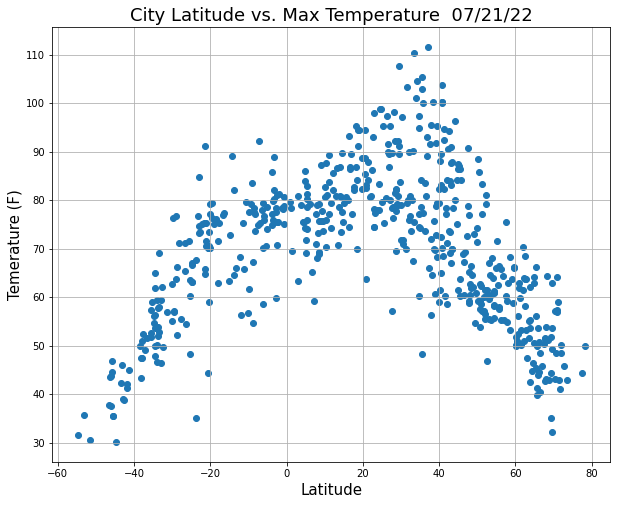

In [47]:
# Plot the Latitude compared to Max Temperature
fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(city_df['Lat'], city_df['Max Temp'])
ax.set_title("City Latitude vs. Max Temperature  " + time.strftime('%x'), fontsize=18)
ax.set_ylabel('Temerature (F)', fontsize=15)
ax.set_xlabel('Latitude', fontsize=15)
ax.grid(True)

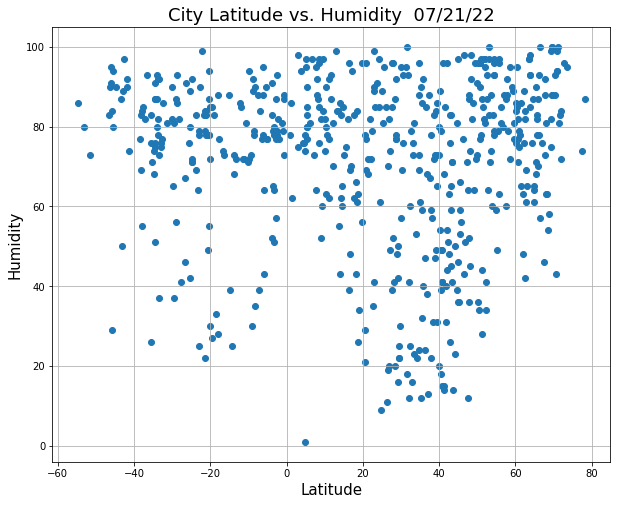

In [49]:
# Plot the Latitude compared to Humidity
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.scatter(city_df['Lat'], city_df['Humidity'])
ax1.set_title("City Latitude vs. Humidity  " + time.strftime('%x'), fontsize=18)
ax1.set_ylabel('Humidity', fontsize=15)
ax1.set_xlabel('Latitude', fontsize=15)
ax1.grid(True)

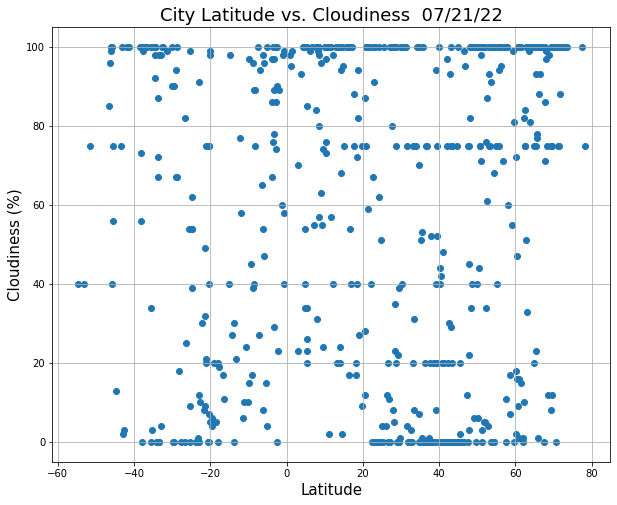

In [51]:
# Plot the Latitude compared to cloudiness
fig2, ax2 = plt.subplots(figsize=(10, 8))
ax2.scatter(city_df['Lat'], city_df['Cloudiness'])
ax2.set_title("City Latitude vs. Cloudiness  " + time.strftime('%x'), fontsize=18)
ax2.set_ylabel('Cloudiness (%)', fontsize=15)
ax2.set_xlabel('Latitude', fontsize=15)
ax2.grid(True)

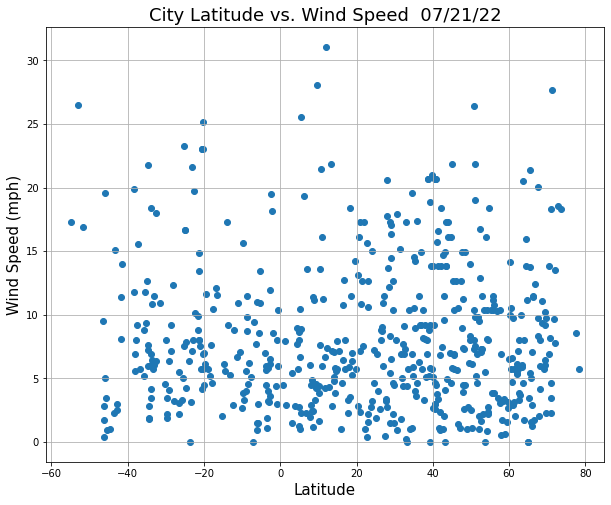

In [63]:
fig3, ax3 = plt.subplots(figsize=(10, 8))
ax3.scatter(city_df['Lat'], city_df['Wind Speed'])
ax3.set_title("City Latitude vs. Wind Speed  " + time.strftime('%x'), fontsize=18)
ax3.set_ylabel('Wind Speed (mph)', fontsize=15)
ax3.set_xlabel('Latitude', fontsize=15)
ax3.grid(True)

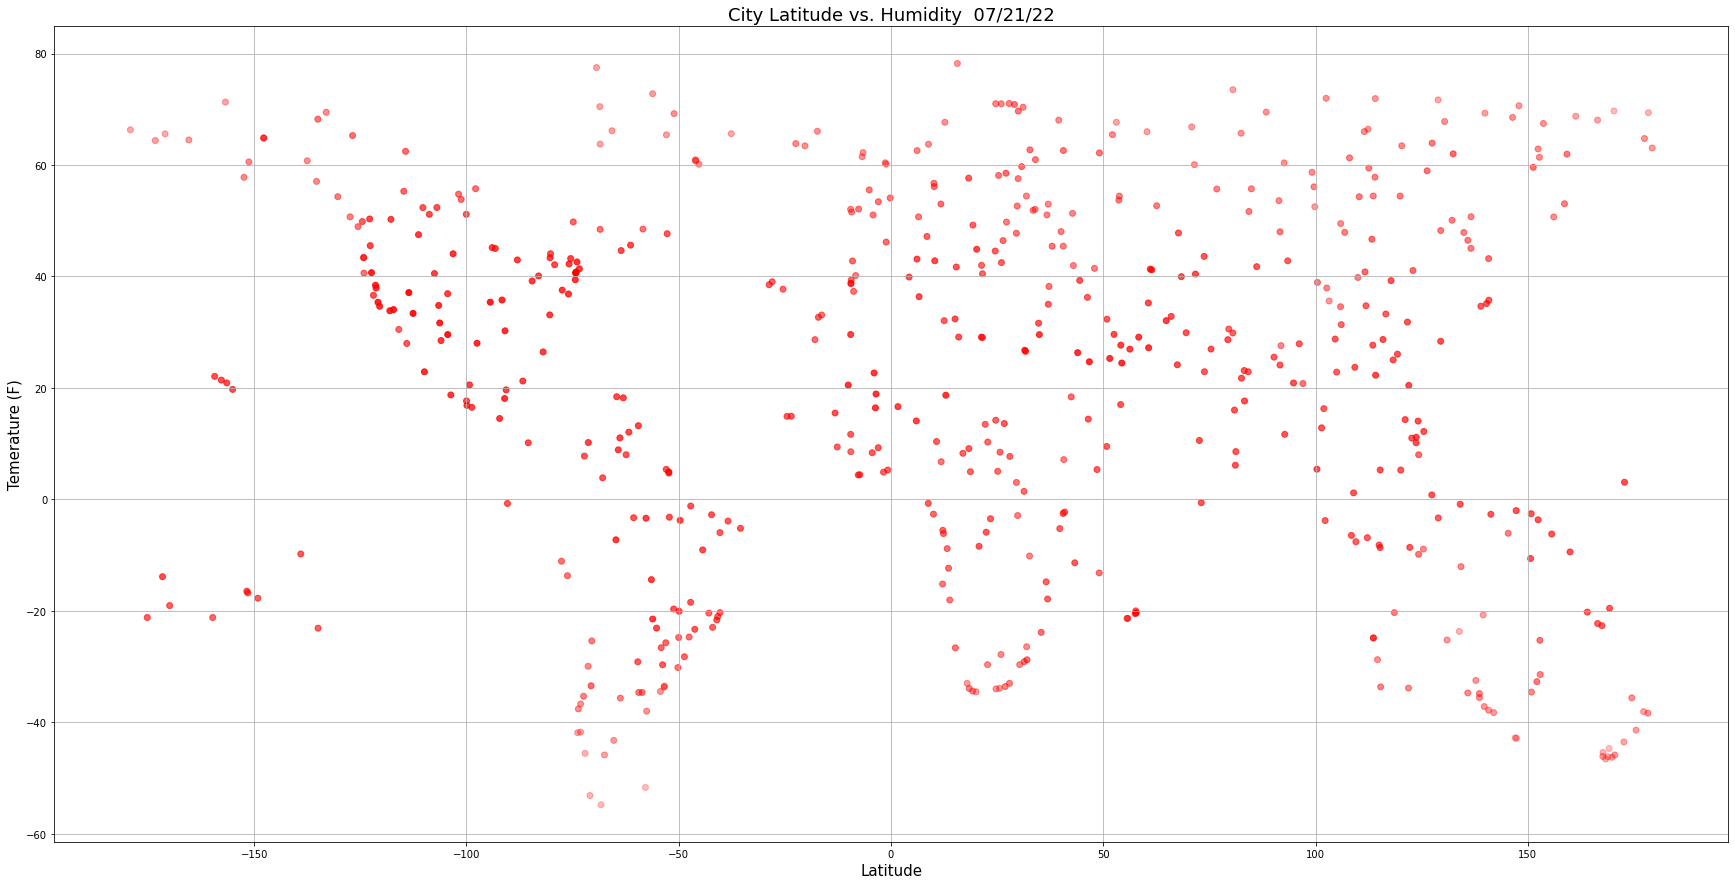

In [66]:
# How much of the world is this randomized dataset?
fig4, ax4 = plt.subplots(figsize=(30, 15))
ax4.scatter(city_df['Lon'], city_df['Lat'], alpha=city_df['Max Temp']/120, color='red')
ax4.set_title("City Latitude vs. Humidity  " + time.strftime('%x'), fontsize=18)
ax4.set_ylabel('Temerature (F)', fontsize=15)
ax4.set_xlabel('Latitude', fontsize=15)
ax4.grid(True)